In [1]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.utils import to_categorical

Training data shape: (60000, 28, 28), Training labels shape: (60000,)
Testing data shape: (10000, 28, 28), Testing labels shape: (10000,)
Processed training data shape: (60000, 28, 28, 1)
Processed testing data shape: (10000, 28, 28, 1)


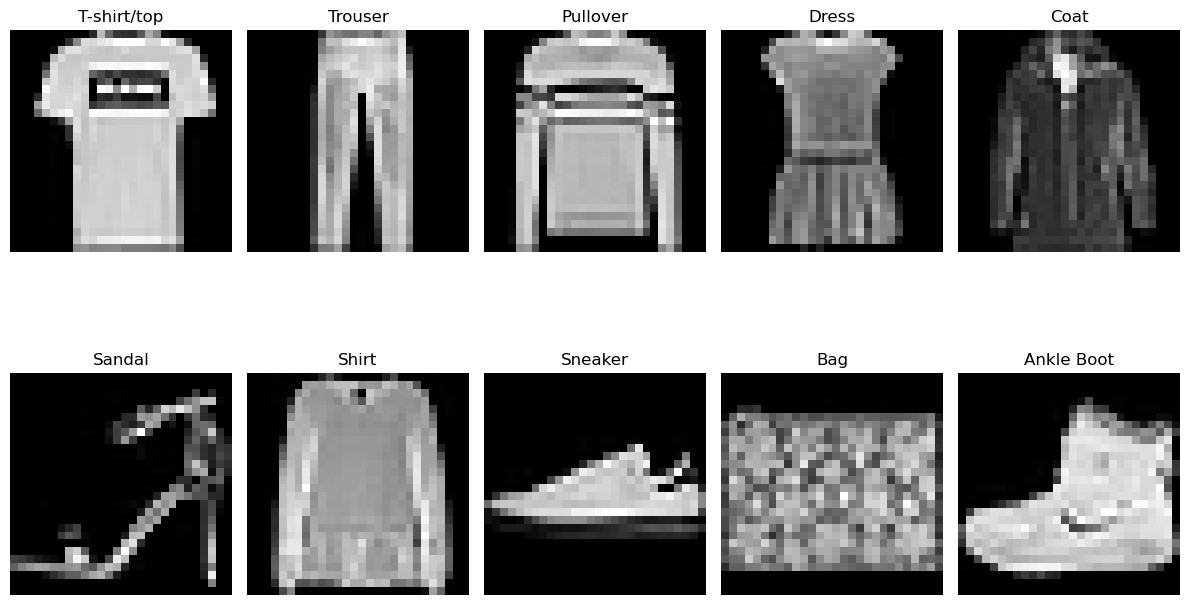

In [8]:
# Load the Fashion MNIST dataset
(images_train, labels_train), (images_test, labels_test) = fashion_mnist.load_data()

# Check the shapes of the dataset
print(f"Training data shape: {images_train.shape}, Training labels shape: {labels_train.shape}")
print(f"Testing data shape: {images_test.shape}, Testing labels shape: {labels_test.shape}")

# Normalize the images to the range [0, 1]
images_train = images_train.astype('float32') / 255.0
images_test = images_test.astype('float32') / 255.0

# Reshape the images to include the channel dimension for CNN input
images_train = np.expand_dims(images_train, axis=-1)
images_test = np.expand_dims(images_test, axis=-1)

# Convert the labels to one-hot encoded vectors
labels_train_onehot = to_categorical(labels_train, 10)
labels_test_onehot = to_categorical(labels_test, 10)

# Verify the shapes after processing
print(f"Processed training data shape: {images_train.shape}")
print(f"Processed testing data shape: {images_test.shape}")

#visualizing the sample of images
# Define the class names for visualization
class_labels = [
    "T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
    "Sandal", "Shirt", "Sneaker", "Bag", "Ankle Boot"
]

# Visualize a sample of images from each class
plt.figure(figsize=(12, 8))
for i in range(10):  
    plt.subplot(2, 5, i + 1) 
    sample_index = np.where(labels_train == i)[0][0]  
    plt.imshow(images_train[sample_index].squeeze(), cmap='gray')  
    plt.title(class_labels[i]) 
    plt.axis('off')  
plt.tight_layout()
plt.show()


In [11]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout, BatchNormalization
from tensorflow.keras.applications import VGG16

# Model 1: Shallow Neural Network
#hidden layer with 128 neurons and output layer with 10 neurons
shallow_nn = Sequential([
    Flatten(input_shape=(28, 28, 1)),  
    Dense(128, activation='relu'),     
    Dense(10, activation='softmax')    
])
# Compile the model
shallow_nn.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
# Display the architecture
shallow_nn.summary()

# Model 2: Basic Convolutional Neural Network
#convolution  layer, pooling layer, flatten for dense layers, hidden layer and output layers
basic_cnn = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),  
    MaxPooling2D(pool_size=(2, 2)),                                 
    Flatten(),                                                     
    Dense(128, activation='relu'),                                
    Dense(10, activation='softmax')                               
])

# Compile the model
basic_cnn.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
# Display the architecture
basic_cnn.summary()

# Model 3 (Without Batch Normalization): Deeper CNN
deeper_cnn_no_bn = Sequential([
    Conv2D(64, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.25),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.3),
    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')
])

# Compile the model
deeper_cnn_no_bn.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Display the architecture
deeper_cnn_no_bn.summary()

# Model 3 (With Batch Normalization): Deeper CNN
deeper_cnn_with_bn = Sequential([
    Conv2D(64, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    BatchNormalization(),  # Normalize feature maps
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.25),
    Conv2D(128, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.3),
    Flatten(),
    Dense(256, activation='relu'),
    BatchNormalization(),
    Dropout(0.5),
    Dense(10, activation='softmax')
])

# Compile the model
deeper_cnn_with_bn.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Display the architecture
deeper_cnn_with_bn.summary()

# Pretrained VGG16 Model
pretrained_vgg = VGG16(weights='imagenet', include_top=False, input_shape=(32, 32, 3))

# Display the architecture of the pretrained model
pretrained_vgg.summary()




/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_4 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 101,770 (397.54 KB)

 Trainable params: 101,770 (397.54 KB)

 Non-trainable params: 0 (0.00 B)

/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_5 (Conv2D)               │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_5 (Flatten)             │ (None, 5408)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 128)            │       692,352 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 693,962 (2.65 MB)

 Trainable params: 693,962 (2.65 MB)

 Non-trainable params: 0 (0.00 B)

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)               │ (None, 26, 26, 64)     │           640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 13, 13, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 13, 13, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 11, 11, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 5, 5, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 5, 5, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_6 (Flatten)             │ (None, 3200)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 256)            │       819,456 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_8 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 10)             │         2,570 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 896,522 (3.42 MB)

 Trainable params: 896,522 (3.42 MB)

 Non-trainable params: 0 (0.00 B)

Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_8 (Conv2D)               │ (None, 26, 26, 64)     │           640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 26, 26, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 13, 13, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_9 (Dropout)             │ (None, 13, 13, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 11, 11, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 11, 11, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_9 (MaxPooling2D)  │ (None, 5, 5, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_10 (Dropout)            │ (None, 5, 5, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_7 (Flatten)             │ (None, 3200)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 256)            │       819,456 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 256)            │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_11 (Dropout)            │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 10)             │         2,570 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 898,314 (3.43 MB)

 Trainable params: 897,418 (3.42 MB)

 Non-trainable params: 896 (3.50 KB)

Model: "vgg16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_9 (InputLayer)      │ (None, 32, 32, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 32, 32, 64)     │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 32, 32, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 16, 16, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 16, 16, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 16, 16, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 8, 8, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 8, 8, 256)      │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 8, 8, 256)      │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 8, 8, 256)      │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 4, 4, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 4, 4, 512)      │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 4, 4, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 4, 4, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 2, 2, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 2, 2, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 2, 2, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 2, 2, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 1, 1, 512)      │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,714,688 (56.13 MB)

 Trainable params: 14,714,688 (56.13 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9155 - loss: 0.2306 - val_accuracy: 0.8884 - val_loss: 0.3179
Epoch 2/100
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9187 - loss: 0.2193 - val_accuracy: 0.8900 - val_loss: 0.3190
Epoch 3/100
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9206 - loss: 0.2088 - val_accuracy: 0.8877 - val_loss: 0.3433
Epoch 4/100
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 1s 943us/step - accuracy: 0.9251 - loss: 0.1992 - val_accuracy: 0.8925 - val_loss: 0.3201
Epoch 5/100
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 1s 879us/step - accuracy: 0.9283 - loss: 0.1937 - val_accuracy: 0.8929 - val_loss: 0.3163
Epoch 6/100
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9272 - loss: 0.1950 - val_accuracy: 0.8893 - val_loss: 0.3468
Epoch 7/100
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 1s 802us/step - accuracy: 0.9306 - loss: 0.1869 - val_accuracy: 0.8881 - val_loss: 0.3439
Epoch 8/100
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 1s 800us/step - accuracy: 0.9320 -

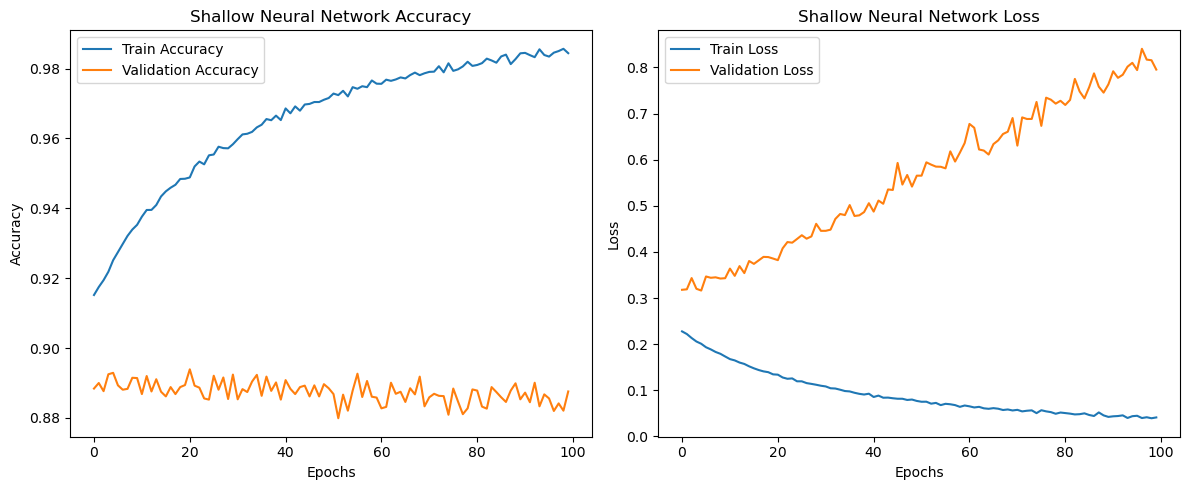

In [13]:
from tensorflow.keras.callbacks import ModelCheckpoint
import matplotlib.pyplot as plt

# Save the best weights during training
checkpoint_shallow = ModelCheckpoint("shallow_nn_best.keras", save_best_only=True, monitor='val_loss', mode='min')

# Train Model 1
history_shallow = shallow_nn.fit(
    images_train, labels_train_onehot,
    validation_split=0.2,
    epochs=100,
    batch_size=32,
    callbacks=[checkpoint_shallow],
    verbose=1
)

# Load the best weights
shallow_nn.load_weights("shallow_nn_best.keras")

# Evaluate Model 1 on test data
test_loss_shallow, test_accuracy_shallow = shallow_nn.evaluate(images_test, labels_test_onehot, verbose=0)
print(f"Model 1 (Shallow NN) Test Accuracy: {test_accuracy_shallow:.4f}")

# Plot training and validation accuracy/loss for Model 1
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history_shallow.history['accuracy'], label='Train Accuracy')
plt.plot(history_shallow.history['val_accuracy'], label='Validation Accuracy')
plt.title('Shallow Neural Network Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history_shallow.history['loss'], label='Train Loss')
plt.plot(history_shallow.history['val_loss'], label='Validation Loss')
plt.title('Shallow Neural Network Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()


Epoch 1/100
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 14s 9ms/step - accuracy: 0.7978 - loss: 0.5697 - val_accuracy: 0.8813 - val_loss: 0.3368
Epoch 2/100
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 17s 11ms/step - accuracy: 0.8938 - loss: 0.2958 - val_accuracy: 0.8963 - val_loss: 0.2936
Epoch 3/100
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 14s 9ms/step - accuracy: 0.9135 - loss: 0.2403 - val_accuracy: 0.9068 - val_loss: 0.2586
Epoch 4/100
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 14s 9ms/step - accuracy: 0.9264 - loss: 0.2008 - val_accuracy: 0.9063 - val_loss: 0.2646
Epoch 5/100
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - accuracy: 0.9338 - loss: 0.1779 - val_accuracy: 0.8990 - val_loss: 0.2847
Epoch 6/100
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 13s 8ms/step - accuracy: 0.9441 - loss: 0.1470 - val_accuracy: 0.9053 - val_loss: 0.2781
Epoch 7/100
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 13s 9ms/step - accuracy: 0.9559 - loss: 0.1214 - val_accuracy: 0.9125 - val_loss: 0.2795
Epoch 8/100
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 13s 9ms/step - accuracy: 0.9616 

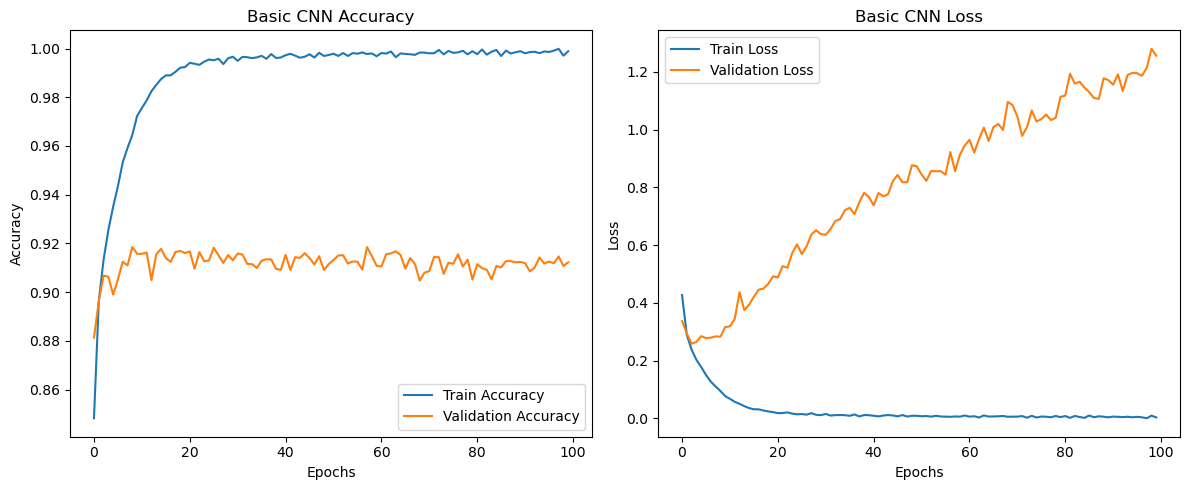

In [14]:
# Save the best weights during training
checkpoint_basic = ModelCheckpoint("basic_cnn_best.keras", save_best_only=True, monitor='val_loss', mode='min')

# Train Model 2
history_basic = basic_cnn.fit(
    images_train, labels_train_onehot,
    validation_split=0.2,
    epochs=100,
    batch_size=32,
    callbacks=[checkpoint_basic],
    verbose=1
)

# Load the best weights
basic_cnn.load_weights("basic_cnn_best.keras")

# Evaluate Model 2 on test data
test_loss_basic, test_accuracy_basic = basic_cnn.evaluate(images_test, labels_test_onehot, verbose=0)
print(f"Model 2 (Basic CNN) Test Accuracy: {test_accuracy_basic:.4f}")

# Plot training and validation accuracy/loss for Model 2
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history_basic.history['accuracy'], label='Train Accuracy')
plt.plot(history_basic.history['val_accuracy'], label='Validation Accuracy')
plt.title('Basic CNN Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history_basic.history['loss'], label='Train Loss')
plt.plot(history_basic.history['val_loss'], label='Validation Loss')
plt.title('Basic CNN Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()


Deeper CNN withought Batch Normalization

Epoch 1/100
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 46s 30ms/step - accuracy: 0.7270 - loss: 0.7447 - val_accuracy: 0.8730 - val_loss: 0.3500
Epoch 2/100
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 41s 27ms/step - accuracy: 0.8616 - loss: 0.3807 - val_accuracy: 0.8812 - val_loss: 0.3112
Epoch 3/100
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 35s 24ms/step - accuracy: 0.8816 - loss: 0.3315 - val_accuracy: 0.8940 - val_loss: 0.2839
Epoch 4/100
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 35s 24ms/step - accuracy: 0.8909 - loss: 0.2949 - val_accuracy: 0.8982 - val_loss: 0.2753
Epoch 5/100
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 41s 27ms/step - accuracy: 0.8995 - loss: 0.2759 - val_accuracy: 0.9060 - val_loss: 0.2549
Epoch 6/100
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 42s 28ms/step - accuracy: 0.9040 - loss: 0.2618 - val_accuracy: 0.9054 - val_loss: 0.2552
Epoch 7/100
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 41s 28ms/step - accuracy: 0.9091 - loss: 0.2525 - val_accuracy: 0.9062 - val_loss: 0.2426
Epoch 8/100
1500/1500 ━━━━━

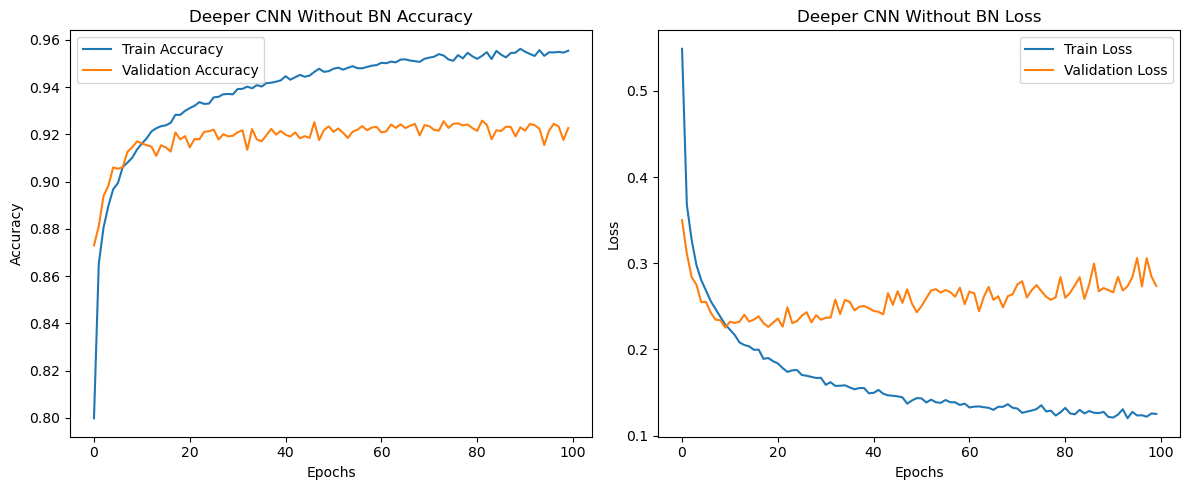

In [15]:
#Deeper CNN withought batch normalization.
print("Deeper CNN withought Batch Normalization\n")
# Save the best weights during training
checkpoint_deeper_no_bn = ModelCheckpoint("deeper_cnn_no_bn_best.keras", save_best_only=True, monitor='val_loss', mode='min')

# Train Model 3 (Without Batch Normalization)
history_deeper_no_bn = deeper_cnn_no_bn.fit(
    images_train, labels_train_onehot,
    validation_split=0.2,
    epochs=100,
    batch_size=32,
    callbacks=[checkpoint_deeper_no_bn],
    verbose=1
)

# Load the best weights
deeper_cnn_no_bn.load_weights("deeper_cnn_no_bn_best.keras")

# Evaluate Model 3 (Without Batch Normalization) on test data
test_loss_deeper_no_bn, test_accuracy_deeper_no_bn = deeper_cnn_no_bn.evaluate(images_test, labels_test_onehot, verbose=0)
print(f"Model 3 (Deeper CNN Without BN) Test Accuracy: {test_accuracy_deeper_no_bn:.4f}")

# Plot training and validation accuracy/loss for Model 3 (Without Batch Normalization)
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history_deeper_no_bn.history['accuracy'], label='Train Accuracy')
plt.plot(history_deeper_no_bn.history['val_accuracy'], label='Validation Accuracy')
plt.title('Deeper CNN Without BN Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history_deeper_no_bn.history['loss'], label='Train Loss')
plt.plot(history_deeper_no_bn.history['val_loss'], label='Validation Loss')
plt.title('Deeper CNN Without BN Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()


deeper CNN with Batch Normalization
Epoch 1/100
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 56s 36ms/step - accuracy: 0.7654 - loss: 0.7108 - val_accuracy: 0.8658 - val_loss: 0.3775
Epoch 2/100
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 55s 36ms/step - accuracy: 0.8616 - loss: 0.3810 - val_accuracy: 0.8824 - val_loss: 0.3304
Epoch 3/100
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 55s 37ms/step - accuracy: 0.8763 - loss: 0.3432 - val_accuracy: 0.8882 - val_loss: 0.3051
Epoch 4/100
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 54s 36ms/step - accuracy: 0.8862 - loss: 0.3097 - val_accuracy: 0.9010 - val_loss: 0.2707
Epoch 5/100
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 133s 89ms/step - accuracy: 0.8943 - loss: 0.2937 - val_accuracy: 0.9064 - val_loss: 0.2549
Epoch 6/100
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 54s 36ms/step - accuracy: 0.8989 - loss: 0.2796 - val_accuracy: 0.8936 - val_loss: 0.2930
Epoch 7/100
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 53s 35ms/step - accuracy: 0.9060 - loss: 0.2568 - val_accuracy: 0.9036 - val_loss: 0.2600
Epoch 8/100
1500/1500 ━━━━━━━━━━

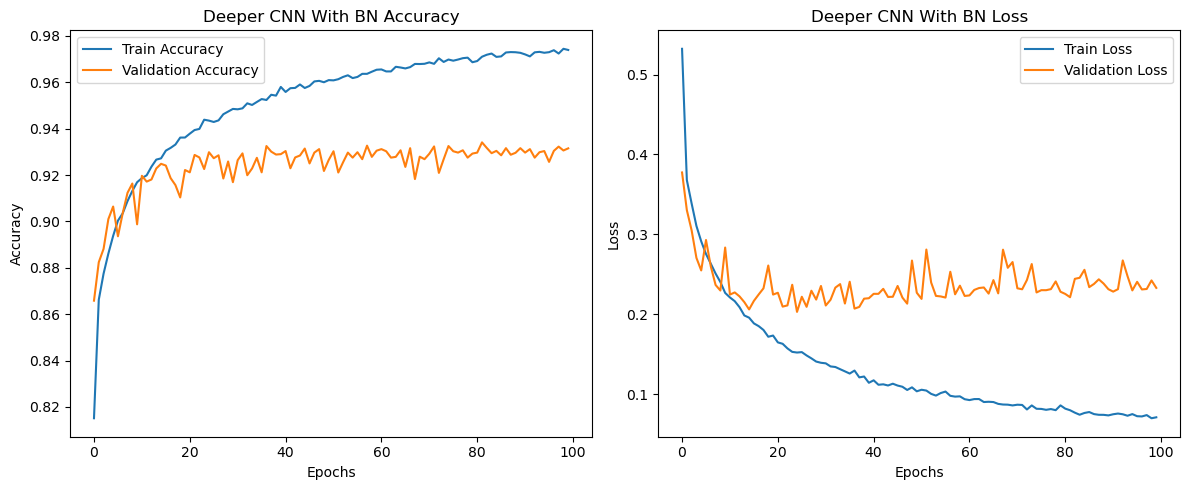

In [16]:
#deeper CNN with Batch Normalization
# Save the best weights during training
print("deeper CNN with Batch Normalization")
checkpoint_deeper_with_bn = ModelCheckpoint("deeper_cnn_with_bn_best.keras", save_best_only=True, monitor='val_loss', mode='min')

# Train Model 3 (With Batch Normalization)
history_deeper_with_bn = deeper_cnn_with_bn.fit(
    images_train, labels_train_onehot,
    validation_split=0.2,
    epochs=100,
    batch_size=32,
    callbacks=[checkpoint_deeper_with_bn],
    verbose=1
)

# Load the best weights
deeper_cnn_with_bn.load_weights("deeper_cnn_with_bn_best.keras")

# Evaluate Model 3 (With Batch Normalization) on test data
test_loss_deeper_with_bn, test_accuracy_deeper_with_bn = deeper_cnn_with_bn.evaluate(images_test, labels_test_onehot, verbose=0)
print(f"Model 3 (Deeper CNN With BN) Test Accuracy: {test_accuracy_deeper_with_bn:.4f}")

# Plot training and validation accuracy/loss for Model 3 (With Batch Normalization)
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history_deeper_with_bn.history['accuracy'], label='Train Accuracy')
plt.plot(history_deeper_with_bn.history['val_accuracy'], label='Validation Accuracy')
plt.title('Deeper CNN With BN Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history_deeper_with_bn.history['loss'], label='Train Loss')
plt.plot(history_deeper_with_bn.history['val_loss'], label='Validation Loss')
plt.title('Deeper CNN With BN Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()


In [17]:
# Evaluate Model 1: Shallow Neural Network
test_loss_shallow, test_accuracy_shallow = shallow_nn.evaluate(images_test, labels_test_onehot, verbose=0)
print(f"Model 1 (Shallow NN) Test Accuracy: {test_accuracy_shallow:.4f}")

# Evaluate Model 2: Basic CNN
test_loss_basic, test_accuracy_basic = basic_cnn.evaluate(images_test, labels_test_onehot, verbose=0)
print(f"Model 2 (Basic CNN) Test Accuracy: {test_accuracy_basic:.4f}")

# Evaluate Model 3 (Without Batch Normalization): Deeper CNN
test_loss_deeper_no_bn, test_accuracy_deeper_no_bn = deeper_cnn_no_bn.evaluate(images_test, labels_test_onehot, verbose=0)
print(f"Model 3 (Deeper CNN Without BN) Test Accuracy: {test_accuracy_deeper_no_bn:.4f}")

# Evaluate Model 3 (With Batch Normalization): Deeper CNN
test_loss_deeper_with_bn, test_accuracy_deeper_with_bn = deeper_cnn_with_bn.evaluate(images_test, labels_test_onehot, verbose=0)
print(f"Model 3 (Deeper CNN With BN) Test Accuracy: {test_accuracy_deeper_with_bn:.4f}")


Model 1 (Shallow NN) Test Accuracy: 0.8841
Model 2 (Basic CNN) Test Accuracy: 0.9020
Model 3 (Deeper CNN Without BN) Test Accuracy: 0.9113
Model 3 (Deeper CNN With BN) Test Accuracy: 0.9228


In [18]:
#Predict the test data for all models.
# Generate predictions for each model
predictions_shallow = np.argmax(shallow_nn.predict(images_test), axis=1)
predictions_basic = np.argmax(basic_cnn.predict(images_test), axis=1)
predictions_deeper_no_bn = np.argmax(deeper_cnn_no_bn.predict(images_test), axis=1)
predictions_deeper_with_bn = np.argmax(deeper_cnn_with_bn.predict(images_test), axis=1)

# Convert true labels from one-hot encoding
true_test_labels = np.argmax(labels_test_onehot, axis=1)

# Print predictions for each model
print("Model 1 (Shallow NN) Predictions:", predictions_shallow)
print("Model 2 (Basic CNN) Predictions:", predictions_basic)
print("Model 3 (Deeper CNN Without BN) Predictions:", predictions_deeper_no_bn)
print("Model 3 (Deeper CNN With BN) Predictions:", predictions_deeper_with_bn)


313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 429us/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step
Model 1 (Shallow NN) Predictions: [9 2 1 ... 8 1 5]
Model 2 (Basic CNN) Predictions: [9 2 1 ... 8 1 5]
Model 3 (Deeper CNN Without BN) Predictions: [9 2 1 ... 8 1 5]
Model 3 (Deeper CNN With BN) Predictions: [9 2 1 ... 8 1 5]


In [19]:
from sklearn.metrics import accuracy_score

# Averaging predictions across Model 1, Model 2, and Model 3 (With Batch Normalization)
committee_predictions = np.argmax(
    (shallow_nn.predict(images_test) +
     basic_cnn.predict(images_test) +
     deeper_cnn_with_bn.predict(images_test)) / 3, axis=1
)

# Print predictions for the committee model
print("Committee Model Predictions:", committee_predictions)

#evaluate the commitee model
# Calculate combined accuracy of the committee model
committee_accuracy = accuracy_score(true_test_labels, committee_predictions)
print(f"Committee Model Test Accuracy: {committee_accuracy:.4f}")



313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 360us/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step
Committee Model Predictions: [9 2 1 ... 8 1 5]
Committee Model Test Accuracy: 0.9192


Confusion Matrix - Model 1 (Shallow NN)


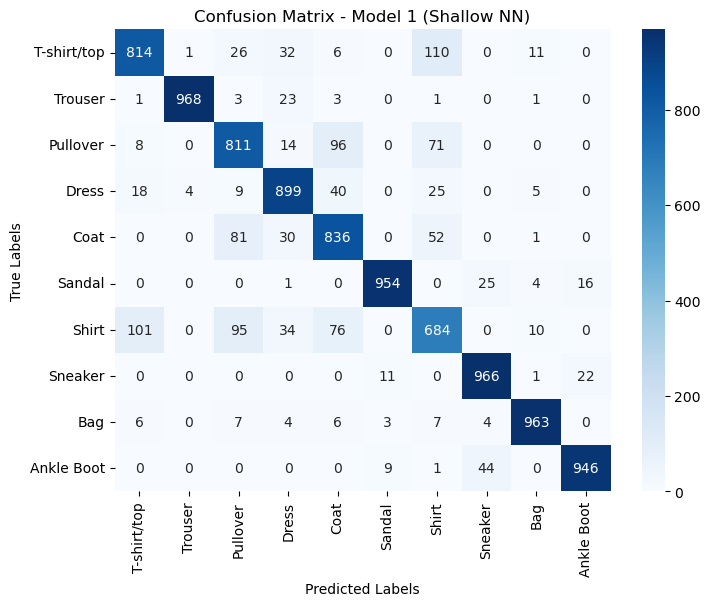

Classification Report - Model 1 (Shallow NN)

              precision    recall  f1-score   support

 T-shirt/top       0.86      0.81      0.84      1000
     Trouser       0.99      0.97      0.98      1000
    Pullover       0.79      0.81      0.80      1000
       Dress       0.87      0.90      0.88      1000
        Coat       0.79      0.84      0.81      1000
      Sandal       0.98      0.95      0.97      1000
       Shirt       0.72      0.68      0.70      1000
     Sneaker       0.93      0.97      0.95      1000
         Bag       0.97      0.96      0.96      1000
  Ankle Boot       0.96      0.95      0.95      1000

    accuracy                           0.88     10000
   macro avg       0.88      0.88      0.88     10000
weighted avg       0.88      0.88      0.88     10000

Confusion Matrix - Model 2 (Basic CNN)


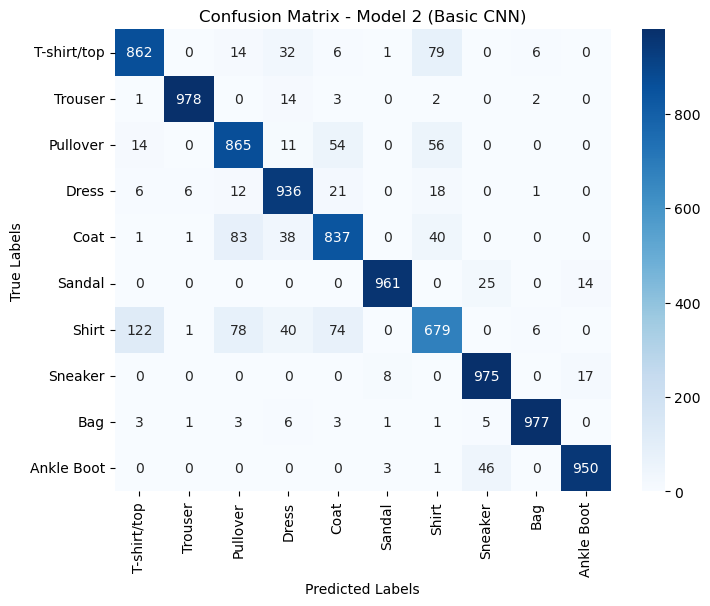

Classification Report - Model 2 (Basic CNN)

              precision    recall  f1-score   support

 T-shirt/top       0.85      0.86      0.86      1000
     Trouser       0.99      0.98      0.98      1000
    Pullover       0.82      0.86      0.84      1000
       Dress       0.87      0.94      0.90      1000
        Coat       0.84      0.84      0.84      1000
      Sandal       0.99      0.96      0.97      1000
       Shirt       0.78      0.68      0.72      1000
     Sneaker       0.93      0.97      0.95      1000
         Bag       0.98      0.98      0.98      1000
  Ankle Boot       0.97      0.95      0.96      1000

    accuracy                           0.90     10000
   macro avg       0.90      0.90      0.90     10000
weighted avg       0.90      0.90      0.90     10000

Confusion Matrix - Model 3 (Deeper CNN Without BN)


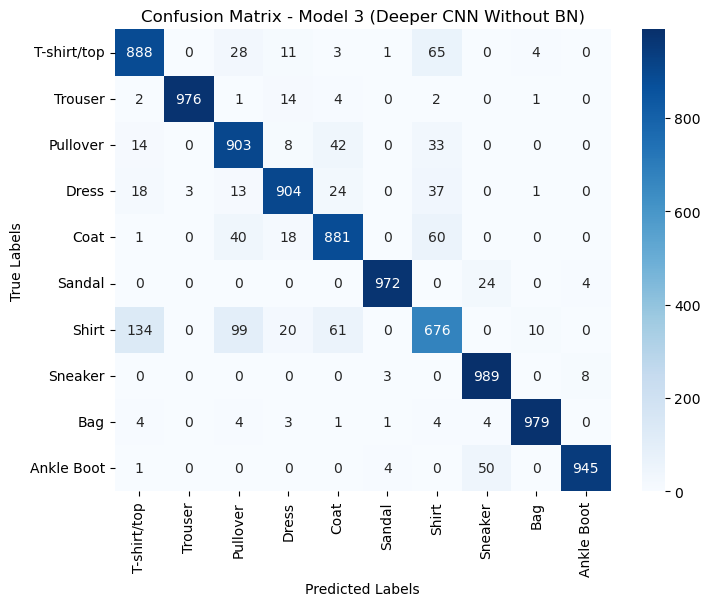

Classification Report - Model 3 (Deeper CNN Without BN)

              precision    recall  f1-score   support

 T-shirt/top       0.84      0.89      0.86      1000
     Trouser       1.00      0.98      0.99      1000
    Pullover       0.83      0.90      0.86      1000
       Dress       0.92      0.90      0.91      1000
        Coat       0.87      0.88      0.87      1000
      Sandal       0.99      0.97      0.98      1000
       Shirt       0.77      0.68      0.72      1000
     Sneaker       0.93      0.99      0.96      1000
         Bag       0.98      0.98      0.98      1000
  Ankle Boot       0.99      0.94      0.97      1000

    accuracy                           0.91     10000
   macro avg       0.91      0.91      0.91     10000
weighted avg       0.91      0.91      0.91     10000

Confusion Matrix - Model 3 (Deeper CNN With BN)


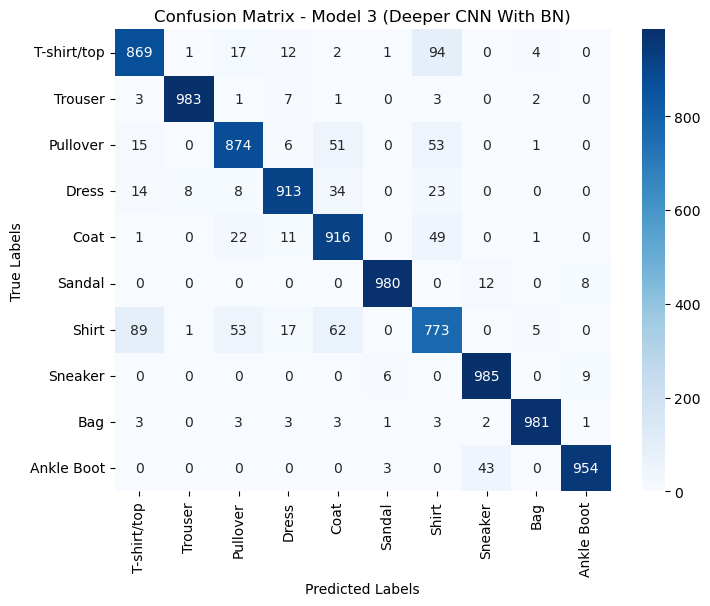

Classification Report - Model 3 (Deeper CNN With BN)

              precision    recall  f1-score   support

 T-shirt/top       0.87      0.87      0.87      1000
     Trouser       0.99      0.98      0.99      1000
    Pullover       0.89      0.87      0.88      1000
       Dress       0.94      0.91      0.93      1000
        Coat       0.86      0.92      0.89      1000
      Sandal       0.99      0.98      0.98      1000
       Shirt       0.77      0.77      0.77      1000
     Sneaker       0.95      0.98      0.96      1000
         Bag       0.99      0.98      0.98      1000
  Ankle Boot       0.98      0.95      0.97      1000

    accuracy                           0.92     10000
   macro avg       0.92      0.92      0.92     10000
weighted avg       0.92      0.92      0.92     10000

Confusion Matrix - Committee Model


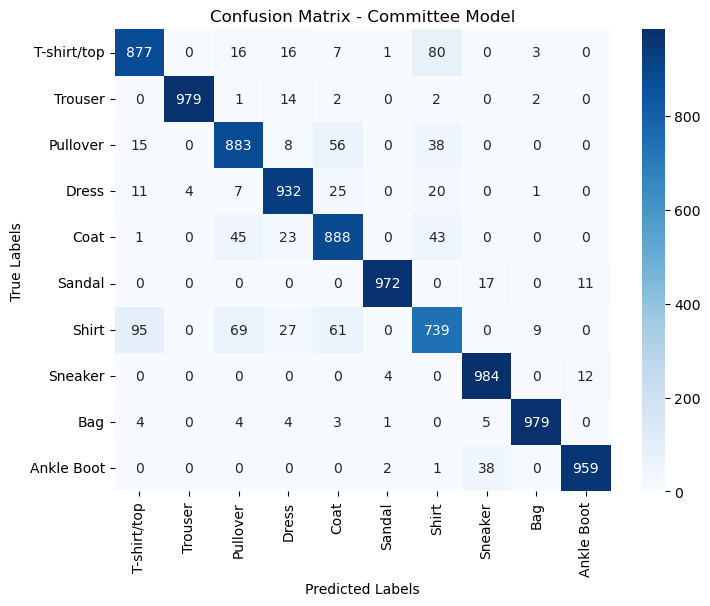

Classification Report - Committee Model

              precision    recall  f1-score   support

 T-shirt/top       0.87      0.88      0.88      1000
     Trouser       1.00      0.98      0.99      1000
    Pullover       0.86      0.88      0.87      1000
       Dress       0.91      0.93      0.92      1000
        Coat       0.85      0.89      0.87      1000
      Sandal       0.99      0.97      0.98      1000
       Shirt       0.80      0.74      0.77      1000
     Sneaker       0.94      0.98      0.96      1000
         Bag       0.98      0.98      0.98      1000
  Ankle Boot       0.98      0.96      0.97      1000

    accuracy                           0.92     10000
   macro avg       0.92      0.92      0.92     10000
weighted avg       0.92      0.92      0.92     10000



In [21]:
#performance metrics and analysis
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Models and Predictions
models = {
    "Model 1 (Shallow NN)": predictions_shallow,
    "Model 2 (Basic CNN)": predictions_basic,
    "Model 3 (Deeper CNN Without BN)": predictions_deeper_no_bn,
    "Model 3 (Deeper CNN With BN)": predictions_deeper_with_bn,
    "Committee Model": committee_predictions
}

# Generate and visualize confusion matrices and classification reports
for model_name, model_predictions in models.items():
    # Confusion Matrix
    conf_matrix = confusion_matrix(true_test_labels, model_predictions)
    print(f"Confusion Matrix - {model_name}")
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=class_labels, yticklabels=class_labels)
    plt.title(f"Confusion Matrix - {model_name}")
    plt.xlabel("Predicted Labels")
    plt.ylabel("True Labels")
    plt.show()
    
    # Classification Report
    print(f"Classification Report - {model_name}\n")
    print(classification_report(true_test_labels, model_predictions, target_names=class_labels))


In [22]:
#Extra Task: 
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define a data augmenter for preprocessing
data_augmenter = ImageDataGenerator(
    rotation_range=20,         # Random rotation
    width_shift_range=0.2,     # Horizontal shift
    height_shift_range=0.2,    # Vertical shift
    shear_range=0.15,          # Shear transformation
    zoom_range=0.2,            # Zoom
    horizontal_flip=True,      # Horizontal flip
    fill_mode='nearest'        # Filling for shifted pixels
)

# Fit augmenter to training data
data_augmenter.fit(images_train)

# Enhanced CNN with Batch Normalization and Dropout
enhanced_model = Sequential([
    Conv2D(64, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.25),
    
    Conv2D(128, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.3),
    
    Flatten(),
    Dense(256, activation='relu'),
    BatchNormalization(),
    Dropout(0.5),
    Dense(10, activation='softmax')
])

# Compile the model
enhanced_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Display the model architecture
enhanced_model.summary()



/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_10 (Conv2D)              │ (None, 26, 26, 64)     │           640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_6           │ (None, 26, 26, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_10 (MaxPooling2D) │ (None, 13, 13, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_12 (Dropout)            │ (None, 13, 13, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 11, 11, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_7           │ (None, 11, 11, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_11 (MaxPooling2D) │ (None, 5, 5, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_13 (Dropout)            │ (None, 5, 5, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_8 (Flatten)             │ (None, 3200)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 256)            │       819,456 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_8           │ (None, 256)            │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_14 (Dropout)            │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 10)             │         2,570 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 898,314 (3.43 MB)

 Trainable params: 897,418 (3.42 MB)

 Non-trainable params: 896 (3.50 KB)

In [26]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.callbacks import ModelCheckpoint

# Split data into training and validation sets
images_train_aug, images_val_aug, labels_train_aug, labels_val_aug = train_test_split(
    images_train, labels_train_onehot, test_size=0.2, random_state=42
)

# Generate augmented data only for the training set
train_generator = data_augmenter.flow(images_train_aug, labels_train_aug, batch_size=32)

# Save the best weights during training
checkpoint_enhanced = ModelCheckpoint("enhanced_model_best.keras", save_best_only=True, monitor='val_loss', mode='min')

# Train the model using the training generator and explicit validation data
history_enhanced = enhanced_model.fit(
    train_generator,  
    validation_data=(images_val_aug, labels_val_aug),  
    epochs=100,
    steps_per_epoch=len(images_train_aug) // 32,  
    callbacks=[checkpoint_enhanced],
    verbose=1
)

# Load the best weights
enhanced_model.load_weights("enhanced_model_best.keras")

# Evaluate the enhanced model on the test set
test_loss_enhanced, test_accuracy_enhanced = enhanced_model.evaluate(images_test, labels_test_onehot, verbose=0)
print(f"Enhanced Model Test Accuracy: {test_accuracy_enhanced:.4f}")


Epoch 1/100
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 57s 38ms/step - accuracy: 0.7710 - loss: 0.6248 - val_accuracy: 0.8011 - val_loss: 0.5035
Epoch 2/100
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.8011 - val_loss: 0.5035
Epoch 3/100
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 53s 36ms/step - accuracy: 0.7791 - loss: 0.5970 - val_accuracy: 0.7981 - val_loss: 0.5412
Epoch 4/100
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.7981 - val_loss: 0.5412
Epoch 5/100
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 54s 36ms/step - accuracy: 0.7833 - loss: 0.5925 - val_accuracy: 0.8390 - val_loss: 0.4278
Epoch 6/100


2024-11-21 13:38:55.568056: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.8390 - val_loss: 0.4278
Epoch 7/100
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 54s 36ms/step - accuracy: 0.7915 - loss: 0.5707 - val_accuracy: 0.8428 - val_loss: 0.4157
Epoch 8/100
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.8428 - val_loss: 0.4157
Epoch 9/100
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 127s 85ms/step - accuracy: 0.7929 - loss: 0.5729 - val_accuracy: 0.8506 - val_loss: 0.3980
Epoch 10/100
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.8506 - val_loss: 0.3980
Epoch 11/100
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 55s 37ms/step - accuracy: 0.7967 - loss: 0.5587 - val_accuracy: 0.8490 - val_loss: 0.3936
Epoch 12/100
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.8490 - val_loss: 0.3936
Epoch 13/100
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 54s 36ms/

2024-11-21 13:49:55.581340: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.8158 - val_loss: 0.4778
Epoch 23/100
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 56s 37ms/step - accuracy: 0.8117 - loss: 0.5170 - val_accuracy: 0.8533 - val_loss: 0.3884
Epoch 24/100
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.8533 - val_loss: 0.3884
Epoch 25/100
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 55s 37ms/step - accuracy: 0.8099 - loss: 0.5202 - val_accuracy: 0.8052 - val_loss: 0.4713
Epoch 26/100
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.8052 - val_loss: 0.4713
Epoch 27/100
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 453s 302ms/step - accuracy: 0.8120 - loss: 0.5190 - val_accuracy: 0.8646 - val_loss: 0.3702
Epoch 28/100
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.8646 - val_loss: 0.3702
Epoch 29/100
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 254s 

2024-11-21 14:15:25.682397: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.8675 - val_loss: 0.3646
Epoch 55/100
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 66s 44ms/step - accuracy: 0.8258 - loss: 0.4764 - val_accuracy: 0.8543 - val_loss: 0.4087
Epoch 56/100
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.8543 - val_loss: 0.4087
Epoch 57/100
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 55s 36ms/step - accuracy: 0.8268 - loss: 0.4754 - val_accuracy: 0.8752 - val_loss: 0.3389
Epoch 58/100
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.8752 - val_loss: 0.3389
Epoch 59/100
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 58s 39ms/step - accuracy: 0.8263 - loss: 0.4776 - val_accuracy: 0.8354 - val_loss: 0.4258
Epoch 60/100
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.8354 - val_loss: 0.4258
Epoch 61/100
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 56s 38m

In [27]:
#weighted average ensemble 
# Calculate validation accuracy for each model during training
val_accuracy_shallow = np.max(history_shallow.history['val_accuracy'])
val_accuracy_basic = np.max(history_basic.history['val_accuracy'])
val_accuracy_deeper_with_bn = np.max(history_deeper_with_bn.history['val_accuracy'])

# Calculate weights based on validation performance
total_val_acc = val_accuracy_shallow + val_accuracy_basic + val_accuracy_deeper_with_bn
weights = [
    val_accuracy_shallow / total_val_acc,
    val_accuracy_basic / total_val_acc,
    val_accuracy_deeper_with_bn / total_val_acc
]

# Weighted averaging for ensemble predictions
ensemble_predictions = np.argmax(
    (weights[0] * shallow_nn.predict(images_test) +
     weights[1] * basic_cnn.predict(images_test) +
     weights[2] * deeper_cnn_with_bn.predict(images_test)), axis=1
)

# Calculate accuracy for the ensemble
ensemble_accuracy = accuracy_score(true_test_labels, ensemble_predictions)
print(f"Ensemble Weighted Averaging Test Accuracy: {ensemble_accuracy:.4f}")


313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 382us/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step
Ensemble Weighted Averaging Test Accuracy: 0.9192


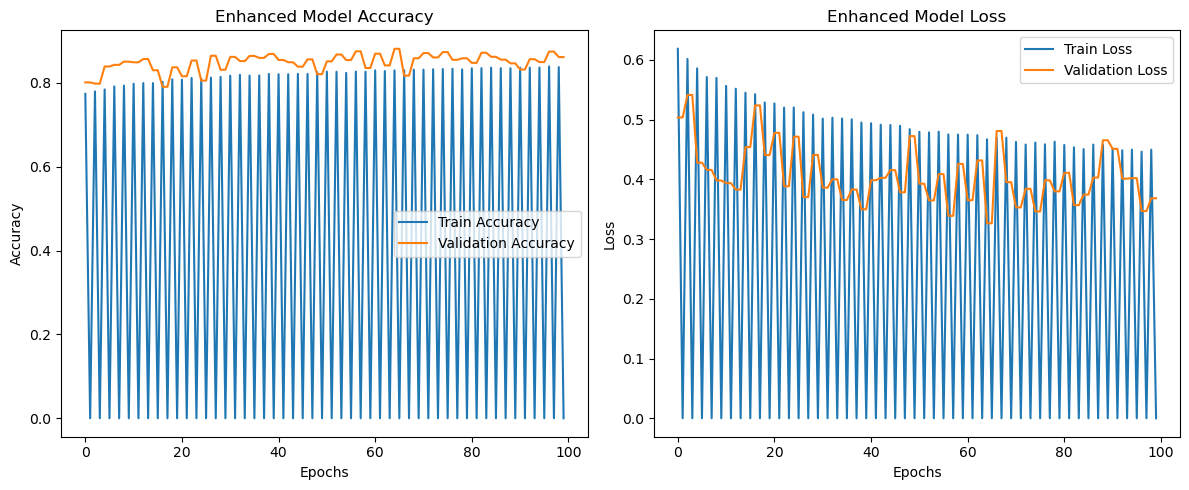

In [28]:
# Plot training curves for the enhanced model
plt.figure(figsize=(12, 5))

# Accuracy
plt.subplot(1, 2, 1)
plt.plot(history_enhanced.history['accuracy'], label='Train Accuracy')
plt.plot(history_enhanced.history['val_accuracy'], label='Validation Accuracy')
plt.title('Enhanced Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Loss
plt.subplot(1, 2, 2)
plt.plot(history_enhanced.history['loss'], label='Train Loss')
plt.plot(history_enhanced.history['val_loss'], label='Validation Loss')
plt.title('Enhanced Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()


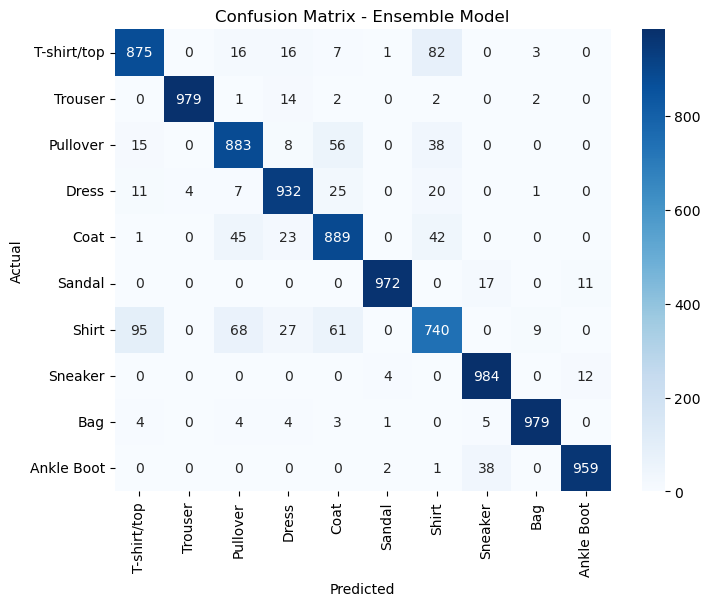

Classification Report - Ensemble Model
              precision    recall  f1-score   support

 T-shirt/top       0.87      0.88      0.87      1000
     Trouser       1.00      0.98      0.99      1000
    Pullover       0.86      0.88      0.87      1000
       Dress       0.91      0.93      0.92      1000
        Coat       0.85      0.89      0.87      1000
      Sandal       0.99      0.97      0.98      1000
       Shirt       0.80      0.74      0.77      1000
     Sneaker       0.94      0.98      0.96      1000
         Bag       0.98      0.98      0.98      1000
  Ankle Boot       0.98      0.96      0.97      1000

    accuracy                           0.92     10000
   macro avg       0.92      0.92      0.92     10000
weighted avg       0.92      0.92      0.92     10000



In [29]:
# Generate confusion matrix and classification report for ensemble
ensemble_conf_matrix = confusion_matrix(true_test_labels, ensemble_predictions)

# Plot confusion matrix for ensemble
plt.figure(figsize=(8, 6))
sns.heatmap(ensemble_conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.title("Confusion Matrix - Ensemble Model")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Classification report for ensemble
print("Classification Report - Ensemble Model")
print(classification_report(true_test_labels, ensemble_predictions, target_names=class_labels))



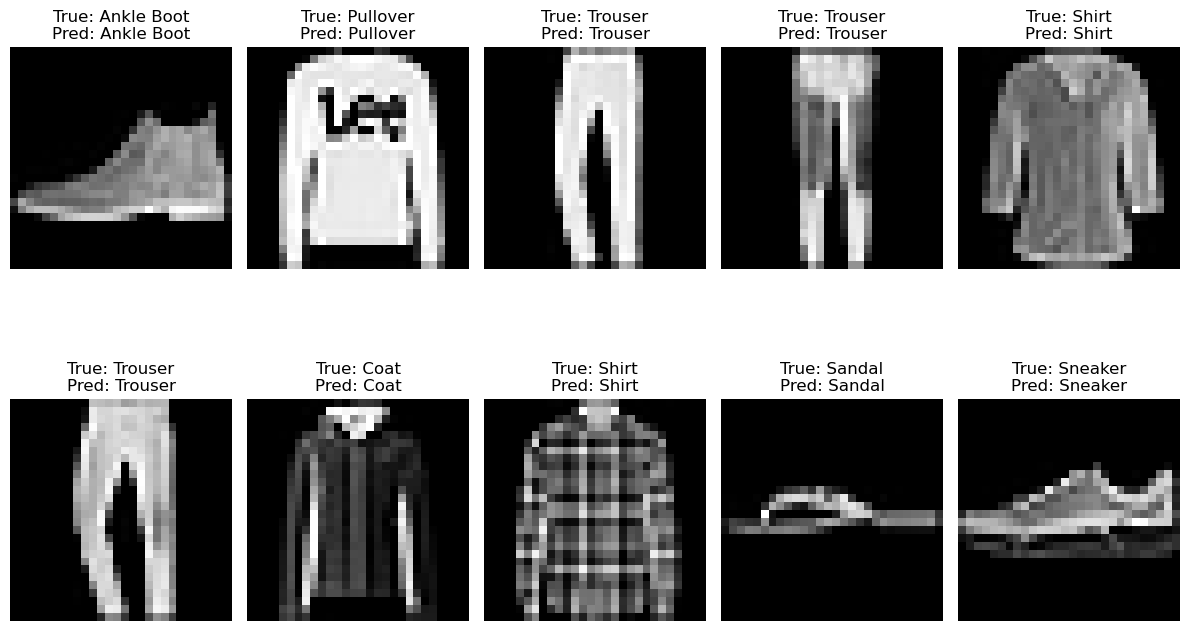

In [30]:
# Display sample predictions for the ensemble model
plt.figure(figsize=(12, 8))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(images_test[i].squeeze(), cmap='gray')
    plt.title(f"True: {class_labels[true_test_labels[i]]}\nPred: {class_labels[ensemble_predictions[i]]}")
    plt.axis('off')
plt.tight_layout()
plt.show()


Training data shape: (60000, 28, 28, 1), Training labels shape: (60000, 10)
Testing data shape: (10000, 28, 28, 1), Testing labels shape: (10000, 10)


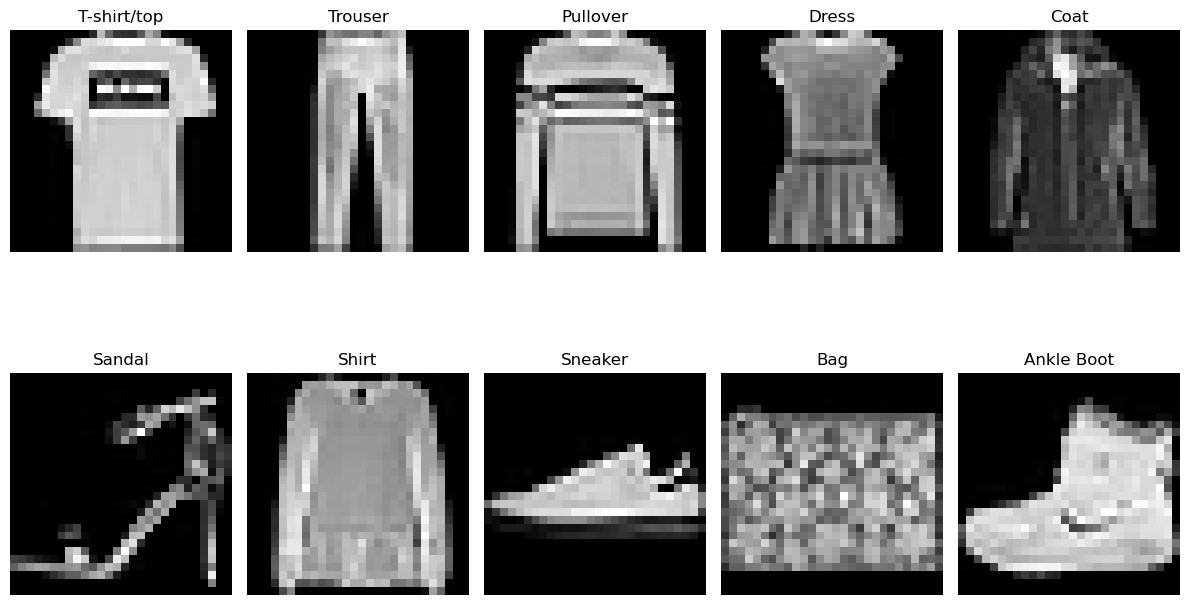

In [31]:
#Question-2
import numpy as np
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, BatchNormalization, Dropout
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Load the Fashion MNIST dataset
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

# Normalize images to [0, 1]
train_images = train_images.astype('float32') / 255.0
test_images = test_images.astype('float32') / 255.0

# Reshape images for CNN input
train_images = np.expand_dims(train_images, axis=-1)  # Add channel dimension
test_images = np.expand_dims(test_images, axis=-1)

# Convert labels to one-hot encoding
train_labels_onehot = to_categorical(train_labels, 10)
test_labels_onehot = to_categorical(test_labels, 10)

# Check shapes of the datasets
print(f"Training data shape: {train_images.shape}, Training labels shape: {train_labels_onehot.shape}")
print(f"Testing data shape: {test_images.shape}, Testing labels shape: {test_labels_onehot.shape}")

#visualizing the sample of images
# Define the class names for visualization
class_labels = [
    "T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
    "Sandal", "Shirt", "Sneaker", "Bag", "Ankle Boot"
]

# Visualize a sample of images from each class
plt.figure(figsize=(12, 8))
for i in range(10):  
    plt.subplot(2, 5, i + 1) 
    sample_index = np.where(labels_train == i)[0][0]  
    plt.imshow(images_train[sample_index].squeeze(), cmap='gray')  
    plt.title(class_labels[i]) 
    plt.axis('off')  
plt.tight_layout()
plt.show()



In [32]:
#model design
# Define the network with Batch Normalization and Dropout layers
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.25),
    
    Conv2D(64, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.25),
    
    Flatten(),
    Dense(128, activation='relu'),
    BatchNormalization(),
    Dropout(0.5),
    Dense(10, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Display the model architecture
model.summary()


/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_12 (Conv2D)              │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_9           │ (None, 26, 26, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_12 (MaxPooling2D) │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_15 (Dropout)            │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_13 (Conv2D)              │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_10          │ (None, 11, 11, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_13 (MaxPooling2D) │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_16 (Dropout)            │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_9 (Flatten)             │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_18 (Dense)                │ (None, 128)            │       204,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_11          │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_17 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_19 (Dense)                │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 225,930 (882.54 KB)

 Trainable params: 225,482 (880.79 KB)

 Non-trainable params: 448 (1.75 KB)

In [33]:
#train the model
from tensorflow.keras.callbacks import ModelCheckpoint

# Save the best weights during training
checkpoint = ModelCheckpoint("best_model_bn_dropout.keras", save_best_only=True, monitor='val_loss', mode='min')

# Train the model
history = model.fit(
    train_images, train_labels_onehot,
    validation_split=0.2,
    epochs=100,
    batch_size=32,
    callbacks=[checkpoint],
    verbose=1
)

# Load the best weights after training
model.load_weights("best_model_bn_dropout.keras")


Epoch 1/100
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 27s 17ms/step - accuracy: 0.7429 - loss: 0.7505 - val_accuracy: 0.8564 - val_loss: 0.3807
Epoch 2/100
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 25s 17ms/step - accuracy: 0.8534 - loss: 0.4120 - val_accuracy: 0.8741 - val_loss: 0.3417
Epoch 3/100
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 30s 20ms/step - accuracy: 0.8723 - loss: 0.3558 - val_accuracy: 0.8733 - val_loss: 0.3374
Epoch 4/100
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 29s 19ms/step - accuracy: 0.8807 - loss: 0.3328 - val_accuracy: 0.9013 - val_loss: 0.2677
Epoch 5/100
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 25s 17ms/step - accuracy: 0.8889 - loss: 0.3102 - val_accuracy: 0.9002 - val_loss: 0.2753
Epoch 6/100
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 25s 17ms/step - accuracy: 0.8922 - loss: 0.2957 - val_accuracy: 0.9052 - val_loss: 0.2604
Epoch 7/100
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 25s 17ms/step - accuracy: 0.8909 - loss: 0.2944 - val_accuracy: 0.9069 - val_loss: 0.2501
Epoch 8/100
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 27s 18ms/step - accuracy: 

Test Accuracy: 0.9259
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Sample Predictions: [9 2 1 1 6 1 4 6 5 7]
Sample True Labels: [9 2 1 1 6 1 4 6 5 7]


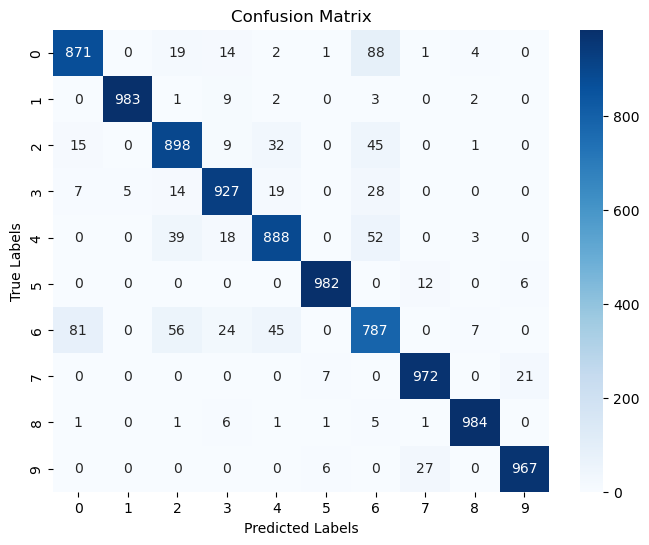

Classification Report:

              precision    recall  f1-score   support

           0       0.89      0.87      0.88      1000
           1       0.99      0.98      0.99      1000
           2       0.87      0.90      0.89      1000
           3       0.92      0.93      0.92      1000
           4       0.90      0.89      0.89      1000
           5       0.98      0.98      0.98      1000
           6       0.78      0.79      0.78      1000
           7       0.96      0.97      0.97      1000
           8       0.98      0.98      0.98      1000
           9       0.97      0.97      0.97      1000

    accuracy                           0.93     10000
   macro avg       0.93      0.93      0.93     10000
weighted avg       0.93      0.93      0.93     10000



In [34]:
# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(test_images, test_labels_onehot, verbose=0)
print(f"Test Accuracy: {test_accuracy:.4f}")
# Generate predictions for the test data
predictions = np.argmax(model.predict(test_images), axis=1)
true_labels = np.argmax(test_labels_onehot, axis=1)

# Print predictions and true labels
print("Sample Predictions:", predictions[:10])
print("Sample True Labels:", true_labels[:10])

# Generate and display the confusion matrix
conf_matrix = confusion_matrix(true_labels, predictions)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=range(10), yticklabels=range(10))
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

# Generate and print the classification report
print("Classification Report:\n")
print(classification_report(true_labels, predictions))


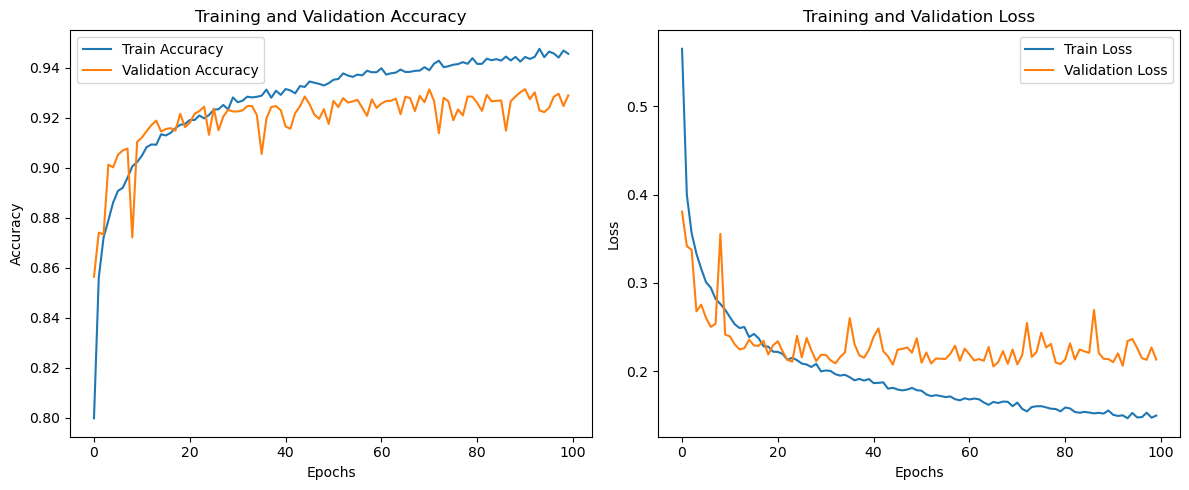

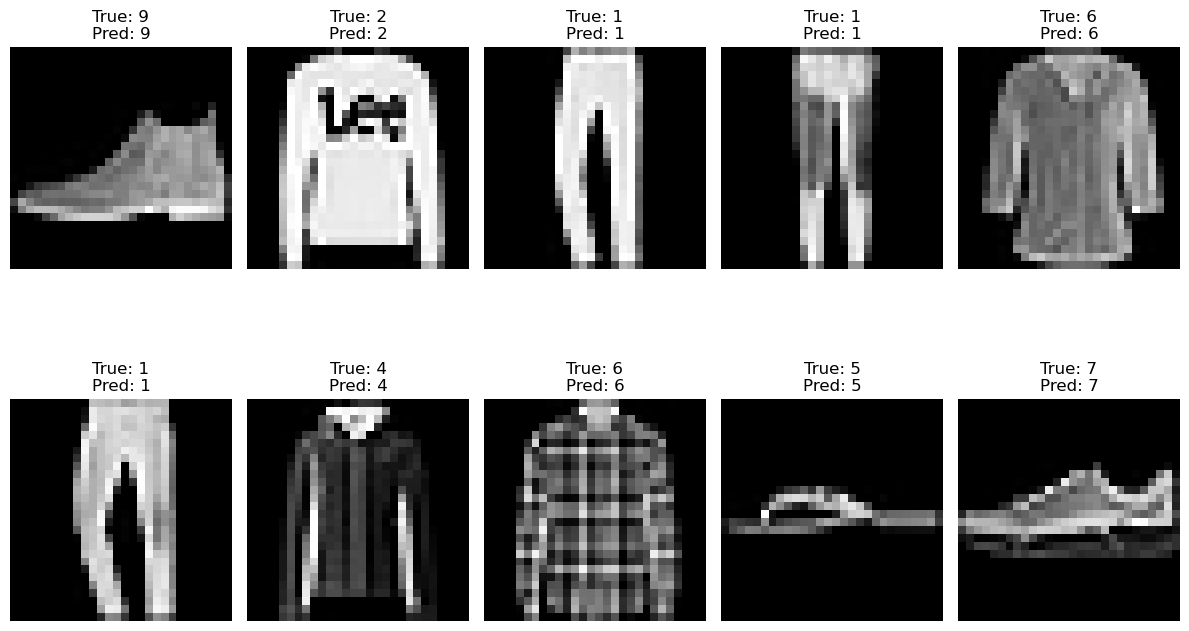

In [35]:
# Plot training and validation accuracy along with training curves
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Plot training and validation loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()


# Visualize sample predictions
plt.figure(figsize=(12, 8))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(test_images[i].squeeze(), cmap='gray')
    plt.title(f"True: {test_labels[i]}\nPred: {predictions[i]}")
    plt.axis('off')
plt.tight_layout()
plt.show()
